In this section we’ll apply scikit-learn to the classification of handwritten digits. This will go a bit beyond
the iris classification we saw before: we’ll discuss some of the metrics which can be used in evaluating the
effectiveness of a classification model.

For most classification problems, it’s nice to have a simple, fast method to provide a quick baseline classifi-
cation. If the simple and fast method is sufficient, then we don’t have to waste CPU cycles on more complex
models. If not, we can use the results of the simple method to give us clues about our data.

Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature,
and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data,
but can perform surprisingly well, for instance on text data.

In [1]:
from sklearn.datasets import load_digits
clf = load_digits()

In [2]:
x=clf.data  # Samples in iris i.e.150 images
y=clf.target # Target Class 

In [3]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
print(clf.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
print(x.shape)

(1797, 64)


In [7]:
print(y.shape)

(1797,)


In [8]:
print(x[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(clf.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(clf.target[i]))

## Visualizing the Data on its principal components

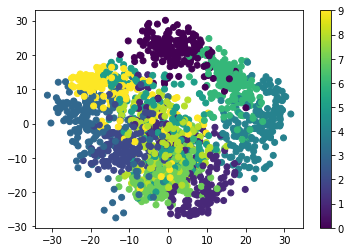

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(clf.data)
plt.scatter(proj[:, 0], proj[:, 1], c=clf.target)
plt.colorbar()

## Classify with Gaussian naive Bayes

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [14]:
x_test[1]

array([ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13.,
       13.,  0.,  0.,  0.,  5., 16., 12.,  1., 12.,  1.,  0.,  0.,  7.,
       13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,  0.,  7., 10.,
        0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12.,
       12., 16.,  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.])

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
y_test[0:10]

array([4, 0, 2, 4, 0, 3, 7, 2, 3, 1])

In [17]:
from sklearn.naive_bayes import GaussianNB
abc = GaussianNB()
abc.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred = abc.predict(x_test)

In [19]:
y_pred[0:10]

array([4, 0, 2, 7, 0, 3, 7, 2, 3, 1])

In [20]:
y_pred[0:10]

array([4, 0, 2, 7, 0, 3, 7, 2, 3, 1])

In [21]:
predicted = abc.predict(x_test[0:10])
expected = y_test[0:10]

In [22]:
predicted

array([4, 0, 2, 7, 0, 3, 7, 2, 3, 1])

In [23]:
expected

array([4, 0, 2, 4, 0, 3, 7, 2, 3, 1])

In [24]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1

    accuracy                           0.90        10
   macro avg       0.92      0.92      0.89        10
weighted avg       0.95      0.90      0.90        10



In [25]:
# Training Accuracy
from sklearn import metrics
y_train_pred = abc.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.852264291017075


In [26]:
# Testing Accuracy 
y_pred = abc.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.84


In [27]:
print(metrics.confusion_matrix(expected, predicted))

[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]]
